In [2]:
import pandas as pd
import numpy as np
from scripts import project_functions as pf
import matplotlib.pyplot as plt

insurance_cleaned = pf.load_and_process("../../data/raw/insurance.csv")
insurance_cleaned.head()


,Age,Sex,BMI,Children,Smoker,Region,Insurance Cost,Weight Class
0,18,male,23.2,0,no,southeast,1121.87,Normal
1,18,male,30.1,0,no,southeast,1131.51,Obese
2,18,male,33.3,0,no,southeast,1135.94,Obese
3,18,male,33.7,0,no,southeast,1136.40,Obese
4,18,male,34.1,0,no,southeast,1137.01,Obese


In [3]:
insurance_cleaned.describe()

,Age,BMI,Children,Insurance Cost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663303,1.094918,13270.422280
std,14.049960,6.098257,1.205493,12110.011259
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [4]:
import pandas_profiling as pdp

dfprofile = pdp.ProfileReport(insurance_cleaned)
dfprofile

#pandas_profiling gives us some interesting information, such as:
# - 1338 observations in the datset
# - 4 numeric variables, 1 categorical variable and 1 boolean variable

<AxesSubplot:xlabel='Age', ylabel='Insurance Cost'>

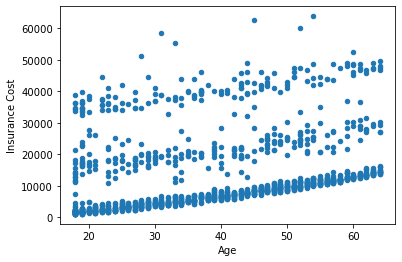

In [5]:
insurance_cleaned.plot(kind = 'scatter', x = 'Age', y = 'Insurance Cost')

#Below is a scatterplot showing age on the X-axis and Insurance cost on the Y-axis.
#We can observe a slight trend of increasing insurance cost as age increases, but the trend is not very distinct.

<AxesSubplot:ylabel='Frequency'>

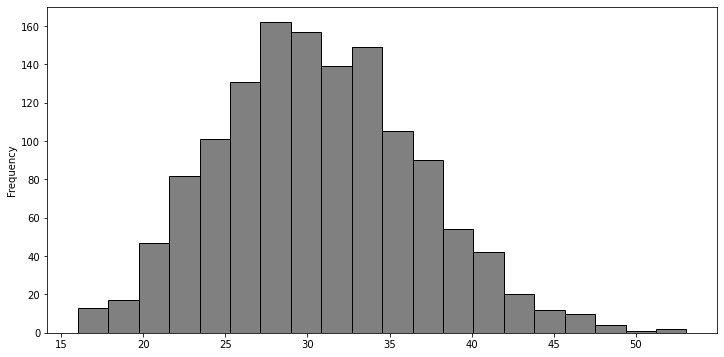

In [6]:
insurance_cleaned['BMI'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')
# Below is a histogram showing the frequency of BMI's in the dataset.
# Most BMI's fall in the range of 25-35
# There are some outliers on both ends of the histogram
# The histogram is slightly positively skewed

<AxesSubplot:>

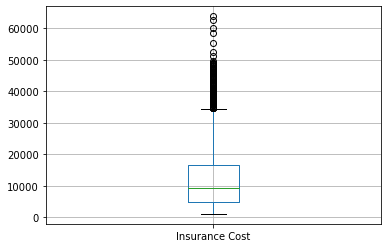

In [7]:
insurance_cleaned.boxplot('Insurance Cost')
# Below is a boxplot of insurance cost
# We can see that that there are several outliers to the positive extreme

<AxesSubplot:ylabel='Region'>

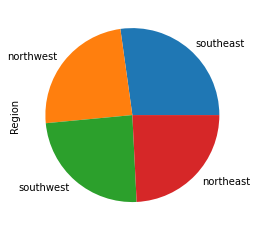

In [8]:
insurance_cleaned['Region'].value_counts().plot(kind='pie')
# Below is a pie chart showing the distribution of regions
# The greatest number of participants resided in the southeast area
# But, the spread of region is relatively evenly distirbuted throughout the 4 regions


In [9]:
import seaborn as sns

sns.set_theme(style="ticks", font_scale = 1.3)

plt.rc("axes.spines", top=False, right=False)

Question: Does having more children mean parents are more likelier to smoke? (Average children for non-smokers and smokers then compare)

In [10]:
non_smokers = insurance_cleaned['Smoker'] == 'no'
mean_for_nonsmokers = insurance_cleaned.loc[non_smokers, 'Children'].mean()
print("The mean number of children for non-smokers is ", mean_for_nonsmokers)

smokers = insurance_cleaned['Smoker'] == 'yes'
mean_for_smokers = insurance_cleaned.loc[smokers, 'Children'].mean()
print("The mean number of children for smokers is ", mean_for_smokers)


The mean number of children for non-smokers is  1.0902255639097744
The mean number of children for smokers is  1.1131386861313868


NameError: name 'Frequency' is not defined

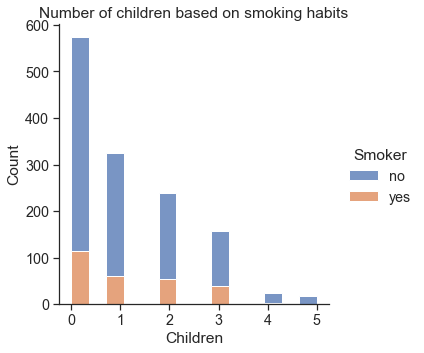

In [20]:
sns.displot(data=insurance_cleaned, x="Children", hue = 'Smoker', multiple= "stack")
plt.title("Number of children based on smoking habits")
plt.ylabel(Frequency)

Text(17.671002416666667, 0.5, 'Frequency')

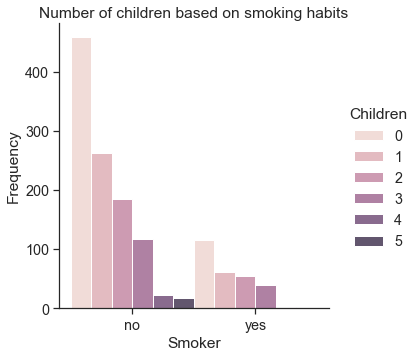

In [22]:
sns.displot(data=insurance_cleaned, x="Smoker", hue = 'Children', multiple = "dodge")
plt.title("Number of children based on smoking habits")
plt.ylabel("Frequency")